In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Unnamed: 0,Survived,Pclass,Age,cat_male,cat_Q,cat_S,cat_Miss,cat_Mr,cat_Mrs,cat_Other,cat_big,cat_small
0,0,0,-1,22.0,1,0,1,0,1,0,0,0,1
1,1,1,1,38.0,0,0,0,0,0,1,0,0,1
2,2,1,-1,26.0,0,0,1,1,0,0,0,0,0
3,3,1,1,35.0,0,0,1,0,0,1,0,0,1
4,4,0,-1,35.0,1,0,1,0,1,0,0,0,0


In [4]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
data

,Survived,Pclass,Age,cat_male,cat_Q,cat_S,cat_Miss,cat_Mr,cat_Mrs,cat_Other,cat_big,cat_small
0,0,-1,22.0,1,0,1,0,1,0,0,0,1
1,1,1,38.0,0,0,0,0,0,1,0,0,1
2,1,-1,26.0,0,0,1,1,0,0,0,0,0
3,1,1,35.0,0,0,1,0,0,1,0,0,1
4,0,-1,35.0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,1,0,1,0,0,0,1,0,0
887,1,1,19.0,0,0,1,1,0,0,0,0,0
888,0,-1,18.0,0,0,1,1,0,0,0,0,1
889,1,1,26.0,1,0,0,0,1,0,0,0,0


In [6]:
X = data.iloc[:, [1,2,3,4,5,6,7,8,9,10,11]].values
y = data.iloc[:, 0].values

## Logestic Regression

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logModel = LogisticRegression(random_state= 0)
logModel.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [12]:
y_pred = logModel.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[93 17]
 [15 54]]


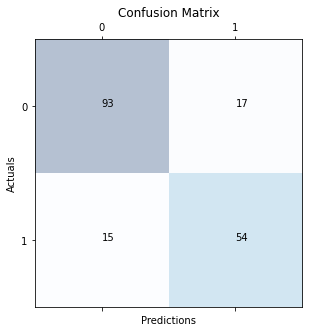

In [14]:
plt.matshow(cf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(cf_matrix.shape[0]):
    for j in range(cf_matrix.shape[1]):
        plt.text(x=j, y=i,s=cf_matrix[i, j])

In [15]:
from sklearn import metrics

y_pred = logModel.predict(X_test)

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'logictic regression model Accuracy: {100*accracy:.3} %')
print (f'logictic regression model f1_score: {100*f1_score:.3} %')
print (f'logictic regression model precision: {100*precision:.3} %')
print (f'logictic regression model recall: {100*recall:.3}  %')

logictic regression model Accuracy: 82.1 %
logictic regression model f1_score: 77.1 %
logictic regression model precision: 76.1 %
logictic regression model recall: 78.3  %


## KNN Algorithm

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [17]:
y_pred=knn.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[101   9]
 [ 24  45]]


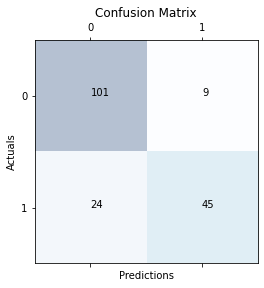

In [19]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')


for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])

In [20]:
from sklearn import metrics

accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'KNN model Accuracy: {100*accracy:.3} %')
print (f'KNN model f1_score: {100*f1_score:.3} %')
print (f'KNN model precision: {100*precision:.3} %')
print (f'KNN model recall: {100*recall:.3}  %')

KNN model Accuracy: 81.6 %
KNN model f1_score: 73.2 %
KNN model precision: 83.3 %
KNN model recall: 65.2  %


In [21]:
error_rate = []
k_vals = range(1,40)

for i in k_vals:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

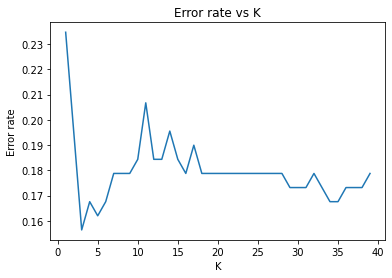

In [22]:
plt.plot(k_vals, error_rate)
plt.title('Error rate vs K')
plt.xlabel('K')
plt.ylabel('Error rate')

## SVM Algorithm

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
from sklearn import svm
SVM_model=svm.SVC() 
SVM_model.fit(X_train,y_train)

SVC()

In [26]:
y_pred=SVM_model.predict(X_test)

In [27]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[95 15]
 [16 53]]


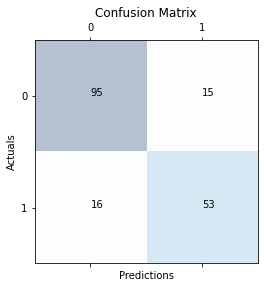

In [28]:
plt.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i,s=conf_matrix[i, j])
 
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()

In [29]:
accracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)

print (f'SVM_model model Accuracy: {100*accracy:.3} %')
print (f'SVM_model model f1_score: {100*f1_score:.3} %')
print (f'SVM_model model precision: {100*precision:.3} %')
print (f'SVM_model model recall: {100*recall:.3}  %')

SVM_model model Accuracy: 82.7 %
SVM_model model f1_score: 77.4 %
SVM_model model precision: 77.9 %
SVM_model model recall: 76.8  %
